### Pytorch workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
                     2: "building model",
                     3: "fitting the model to the data (training)",
                     4: "making prediction and evaluting the model (inference)",
                     5: "saving and load model",
                     6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'building model',
 3: 'fitting the model to the data (training)',
 4: 'making prediction and evaluting the model (inference)',
 5: 'saving and load model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #torch.nn contain all Pytorch's building block for neural networks
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__ 

d:\work\personal-projects\pytorch-nlp\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.13.1+cu117'

### 1.Data
Data can be almost anything... in machine learning
* image of any kind
* ecel sheet
* video
* audio
* dna
* tet

Machine is a game of 2 parts:
1. get the data into the numerical presentation
2. build a model to learn patterns in that numerical presentation

Let's create some *know* data using the linear regresstion formula.

We'll use linear regresstion fomula to make a straight line with *know* **parameters**

In [3]:
#create *know* parameters
weight = 0.7
bias = 0.3

#create 
start =0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim =1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

#### Spliting data into traning sets and testing sets

In [5]:
##create train split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [6]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

40 40
10 10


#### visualize data

In [7]:
def plot_prediction(train_data = X_train,
                   train_label =y_train,
                   test_data = X_test,
                   test_label = y_test,
                   prediction =None):
    """
    Plot training data, test data and compares prediction
    """
    plt.figure(figsize=(10,7))
    
    #plot the train data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label = "train")
    
    #plot the test data in green
    plt.scatter(test_data, test_label, c="g", s=4, label = "test")
    
    #plot the prediction if esiXt
    if prediction is not None:
        plt.scatter(test_data, prediction, c= "r", s=4, label = "prediction")
    
    #show the legend
    plt.legend(prop = {"size":14})

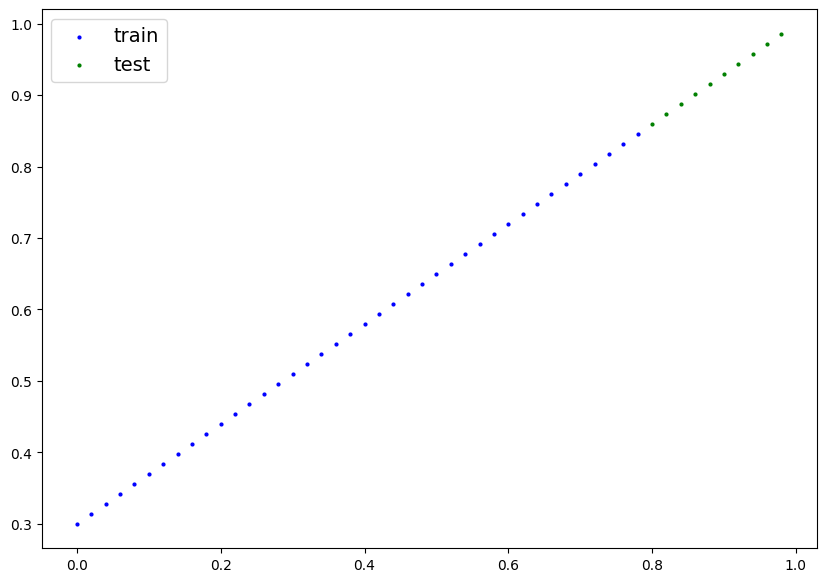

In [8]:
plot_prediction()

### 2.Build model
Pytorch model building essential
* torch.nn - contain all building blocks for all computational graphs (a neural networks can be considered a coomputational graphs)
* torch.nn - what parameters should model try and learn, often the Pytorch layers in torch.nn will set these for us
* torch.nn.Module - a base class for all nerural network modules, if you subclass it, your should overwrite forward()
* torch.optim - these where the optimizers in Pytorch live, they will help in gradient decent
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method define what happend in the forward computation

**Pytorch Cheat Sheet** - https://pytorch.org/tutorials/beginner/ptcheat.html

In [54]:
import torch
from torch import nn
#create a linear regression  model class
class LinearRegressionModel(nn.Module): #<- almost everything in pytorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, #<- start with the random weight and adjust to the idea weight
                                              requires_grad = True, #<- can this parameter can be updated via gradient decent
                                              dtype = torch.float)) 
        self.bias = nn.Parameter(torch.rand(1, #<- start with the random weight and adjust to the idea weight
                                              requires_grad = True, #<- can this parameter can be updated via gradient decent
                                              dtype = torch.float)) 
        
    #Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: #<- x is the input data
        return self.weights * x + self.bias #this is the linear regression fomular
    


Can see inside the model with `.parameters`

In [55]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [56]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

#### making prediction using `torch.inference_mode()`

When we past the data to the model,it's go throught forward()

Passing X_test to the model and compare the output to the y_test to check the predictive power

In [57]:
#making prediction with torch.inference_mode().
# torch.inference_mode() is a context manager, when using this, Pytorch disable some inforamation using in trainning process
#hence that make the predict faster than usual
with torch.inference_mode():
    y_preds = model_0(X_test)

## can use this to remove Pytorch gradient tracking however don't have other efficency like inference_mode()
# with torch.no_grad():
#     y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [58]:
#Can make prediction just by passing data into model.
#But Pytorch will keep tracking information for trainning so the prediction is slower
y_preds_2 = model_0(X_test)
y_preds_2

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [59]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

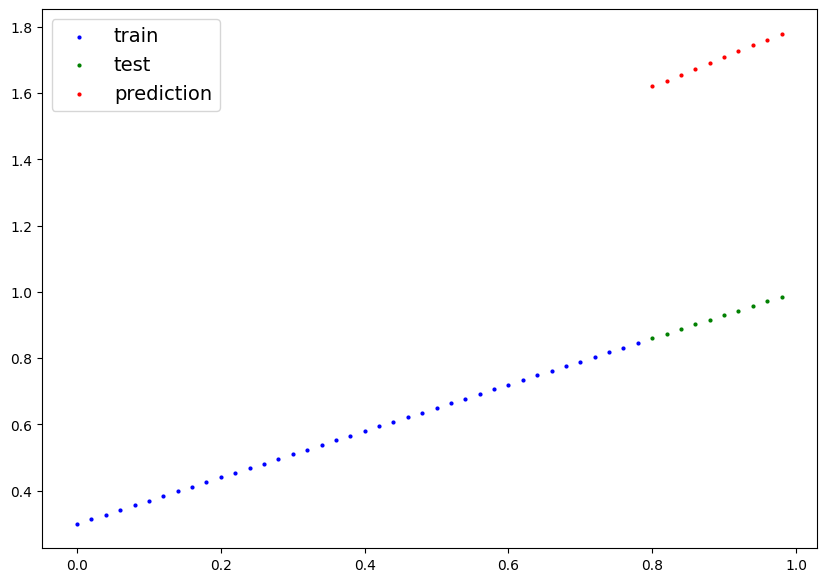

In [60]:
plot_prediction(prediction = y_preds)

### 2.Training model
The main idea of training is for a model to move from `unknown` parameters (these may be random) to some `known` parameters

In other words from a poor representation of the data to better representation of the data

One way to measure how poor or how wrong the model predictions are is to use **loss function**

* Note: Loss function may be called cost function or criterion in different areas.

Things we need to train:

* **Lost function:** a function to measure how wrong the model predictions are to the idea output. The lower is better. 

* **Optimizer:** take into account the loss of a model, and adjusts the model's parameters (e.g. weights & bias) to improve the loss function.
    * Inside the Optimizer, you often have to set two parameters:
        * `params`: the models parameters you'd like to optimize
        * `lr`: learning rate, a hyper parameter you need to set be hand, define how big/small the optimizer change in each step (a small `lr` result small change, a large `lr` result large change)

Specifically for Pytorch, we need :
* A training loop
* A testing loop

In [61]:
#setup loss fuction
loss_fn = nn.L1Loss()
#setup optimizerr
optimizer = torch.optim.SGD(params = model_0.parameters(), #Stochastic gradient decent
                           lr = 0.01, #learning rate
                           momentum = 0.3) #momentum

In [62]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.3
    nesterov: False
    weight_decay: 0
)

#### Building a training loop and testing loop
A couple of things we need  in a training loop:

0. Loop through the data and do...
1. Forward pass (this involde data moving through our model `forward()` function) to make the prediction on data - also call forward propagation
2. Calculate the loss (compare the forward path prediction to the ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward of the network to calculate the gradients of each of the parameters of our model with respect to the loss - also call **backpropagation**
5. Optimzer step - use the optimzer to adjust the model's parameters to try and improve the loss **gradient decent**

In [63]:
torch.manual_seed(42)
#a epoch is an loop through the data - this is a hyper parameters
epochs = 100

#create a list to store the value infomation
epochs_count = []
loss_values =[]
test_loss_values = []

### training
#step 0: loop through the data
for epoch in range(epochs):

    #set the model in training mode
    model_0.train() #train model in Pytorch sets all parameters that require gradients to require gradients
    
    #step 1: Forward pass
    y_preds = model_0(X_train)
    
    #step 2: Calculate the loss
    loss = loss_fn(y_preds, y_train)
    
    #step 3: optimier zero grads
    optimizer.zero_grad()
    
    #step 4: perform backpropagation on the loss with respect to the parameter of the model
    loss.backward()
    
    #step 5: step the omtimizer (perform gradient descent)
    #by default the optimizer is accumlumate through the loop so... we have to zero them in step 3 for the next iteration of the loop
    optimizer.step() 
    
    ### testing
    #turn off the different setting in the model not need for evaluation/testing (dropout/batchnorm)
    model_0.eval()
    with torch.inference_mode(): #turn of gradient tracking
        #1. forward pass
        test_preds = model_0(X_test)
        
        #2. calculate the loss
        test_loss = loss_fn(test_preds, y_test)
    if epoch % 10 == 0:
        epochs_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0, Loss: 0.6860889196395874, Test Loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 10, Loss: 0.5285568237304688, Test Loss: 0.5737839937210083
OrderedDict([('weights', tensor([0.8234])), ('bias', tensor([0.7640]))])
Epoch: 20, Loss: 0.3639710545539856, Test Loss: 0.38134104013442993
OrderedDict([('weights', tensor([0.7677])), ('bias', tensor([0.6211]))])
Epoch: 30, Loss: 0.1993851214647293, Test Loss: 0.188897967338562
OrderedDict([('weights', tensor([0.7119])), ('bias', tensor([0.4783]))])
Epoch: 40, Loss: 0.03479941934347153, Test Loss: 0.003623789642006159
OrderedDict([('weights', tensor([0.6562])), ('bias', tensor([0.3354]))])
Epoch: 50, Loss: 0.006258939392864704, Test Loss: 0.013586169108748436
OrderedDict([('weights', tensor([0.6713])), ('bias', tensor([0.3120]))])
Epoch: 60, Loss: 0.0013707310426980257, Test Loss: 0.003262454178184271
OrderedDict([('weights', tensor([0.6953])), ('bias', tensor([0.3009]))])
Epoch: 70

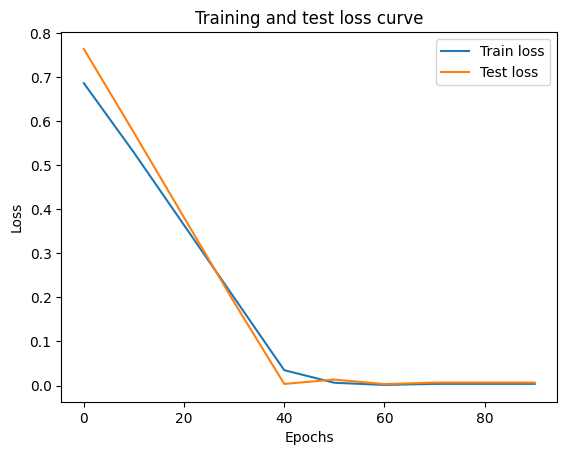

In [66]:
#plot the loss curve
import numpy as np
plt.plot(epochs_count, np.array(torch.tensor(loss_values).cpu().numpy()), label='Train loss')
plt.plot(epochs_count, test_loss_values, label = 'Test loss')
plt.title("Training and test loss curve")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

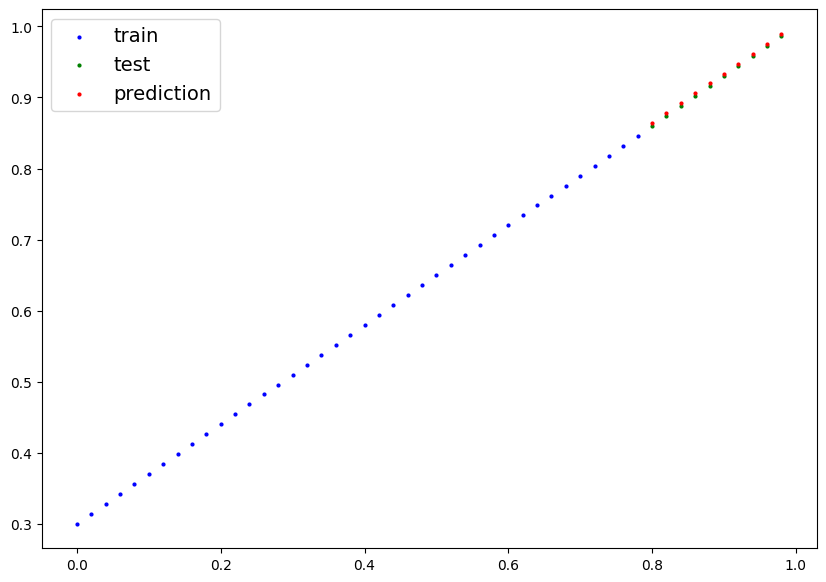

In [53]:
with torch.inference_mode():
    final_y_pred = model_0(X_test)

plot_prediction(prediction = final_y_pred)

### 3.Saving and loading the model in Pytorch
There are 3 main methods you should know about saving and loading models in Pytorch
1. `torch.save()` - allows you to save a Pytorch object in Python's pickle format
2. `torch.load()` - allows you to load a Pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [72]:
##saving a model
from pathlib import Path

#1. Create model folder
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create a model save path
MODEL_NAME = "01_Pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model state dict
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

model\01_Pytorch_workflow.pth
saving model to model\01_Pytorch_workflow.pth


Since we save the model_0 state dict, we need to create a new model's instance and load the saved `state_dict` into that.

In [75]:
##loading a model
###create a new instance of the model
loaded_model = LinearRegressionModel()
###load the saved state dict of the model_0
model_state_dict = torch.load(f = MODEL_SAVE_PATH,
                         map_location = torch.device('cuda:0'))
###update the new model with the saved state dict
loaded_model.load_state_dict(model_state_dict)

<All keys matched successfully>

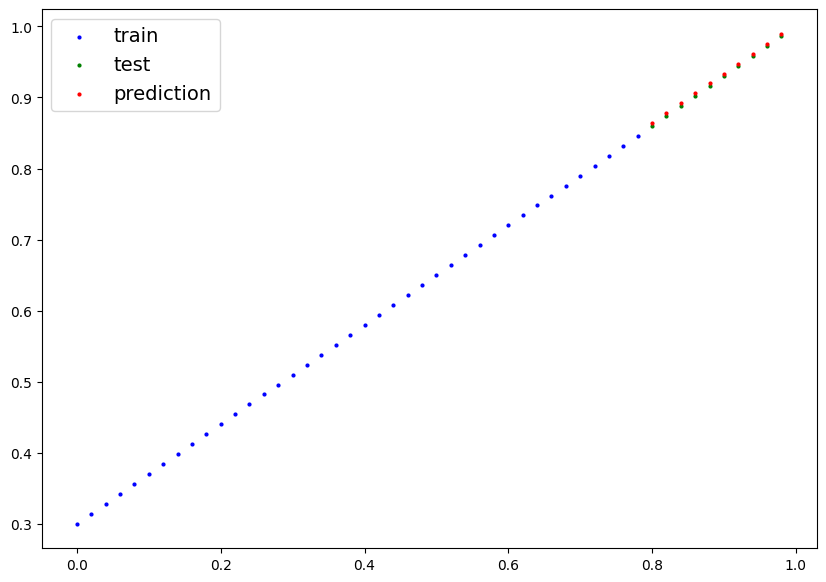

In [76]:
###making prediction with the saved state dict and plot the predictions
with torch.inference_mode():
    loaded_preds = loaded_model(X_test)
plot_prediction(prediction = loaded_preds)

### 4.Putting things together


In [80]:
###import libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#### 4.1 Data

In [165]:
weigth = 3
bias = -5

X = torch.arange(0,2, 0.02).unsqueeze(dim = 1)
y = weight * X + bias

#devide train, test
test_split = int( 0.8 * len(X))
##train data
train_data = X[:test_split]
train_label = y[:test_split]
##test data
test_data = X[test_split:]
test_label = y[test_split:]

In [166]:
print(len(train_data),len(train_label))
print(len(test_data), len(test_label))

80 80
20 20


In [174]:
def plot_data(train_data = train_data,
             train_label = train_label,
             test_data = test_data,
             test_lable = test_label,
             predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data.cpu(), train_label.cpu(), c='b', s=4, label ='train')
    plt.scatter(test_data.cpu(), test_label.cpu(), c='g', s= 4, label ='test')
    if predictions is not None:
        plt.scatter(test_data.cpu(), predictions.cpu(), c='r', s=4, label ='prediction')
    plt.legend(prop= {'size': 14})

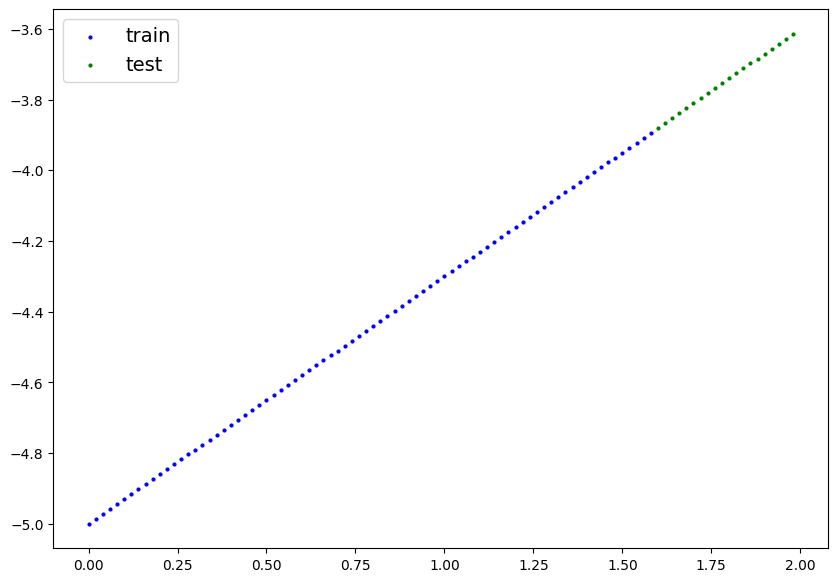

In [175]:
plot_data()

#### 4.2 Building model

In [154]:
#create model class
class LinearRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = torch.nn.Linear(in_features =1,
                                      out_features = 1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [155]:
torch.manual_seed(42)
#create model
model_1 = LinearRegModel()
print(model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [156]:
#check the current device of the model
print(next(model_1.parameters()).device)

cpu


In [157]:
#setup device diagnostic code for cpu or gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [158]:
#set the device for the model
model_1.to(device)
print(next(model_1.parameters()).device)

cuda:0


In [159]:
#create loss function
loss_func = nn.MSELoss()
#create optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                           lr = 0.04)

#### 4.3 Create training and testing loop

In [167]:
#put data on the same device of the model
train_data= train_data.to(device)
train_label = train_label.to(device)
test_data = test_data.to(device)
test_label = test_label.to(device)

In [178]:
epochs = 300
epoch_count = []
loss_values = []
test_loss_value = []

for epoch in range(epochs):
    ##### training process
    model_1.train()
    #forward pass
    y_preds = model_1.forward(train_data)
    #calculate loss
    loss = loss_func(y_preds, train_label)
    #optimizer zero grads
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()
    
    #### testing process
    model_1.eval()
    with torch.inference_mode():
        prediction = model_1(test_data)
        test_loss = loss_func(prediction, test_label)
    if epoch % 50 == 0:
        print(f"Epoch: {epoch}| loss: {loss}| test_loss: {test_loss}")
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_value.append(test_loss)

Epoch: 0| loss: 0.004560504574328661| test_loss: 0.015851935371756554
Epoch: 50| loss: 0.0016756814438849688| test_loss: 0.005824537482112646
Epoch: 100| loss: 0.0006156942690722644| test_loss: 0.0021401059348136187
Epoch: 150| loss: 0.00022622155665885657| test_loss: 0.0007863484206609428
Epoch: 200| loss: 8.312036516144872e-05| test_loss: 0.0002889324096031487
Epoch: 250| loss: 3.0544204491889104e-05| test_loss: 0.00010616153303999454


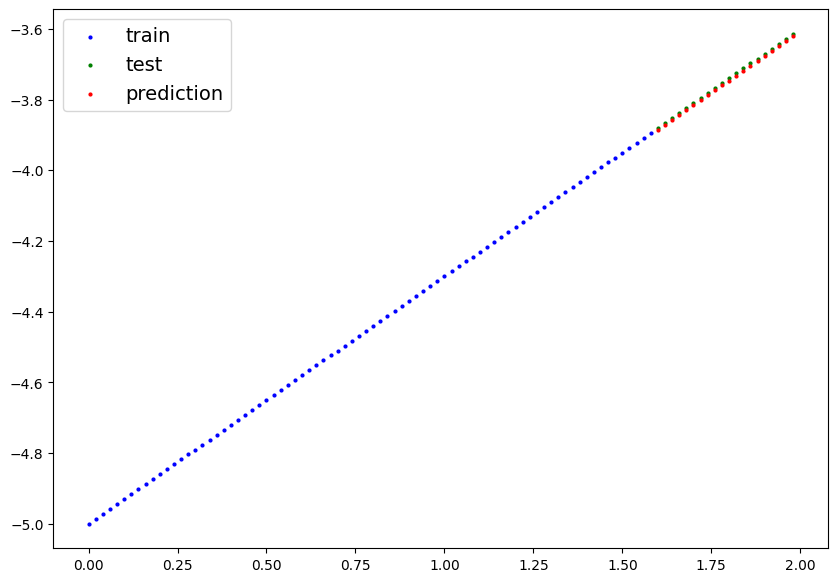

In [180]:
###plot prediction
with torch.inference_mode():
    predictions =  model_1(test_data)
plot_data(predictions = predictions.cpu())

#### 4.4 saving and loading model

In [181]:
MODEL_PATH = Path('model')
MODEL_PATH.mkdir(parents = True,
                exist_ok = True)

In [182]:
MODEL_NAME = 'pytorch_workflow_model_1.pth'
SAVE_MODEL_PATH = MODEL_PATH/MODEL_NAME
SAVE_MODEL_PATH

WindowsPath('model/pytorch_workflow_model_1.pth')

In [183]:
#save the model state dict
print(f"Model is save to {SAVE_MODEL_PATH}")
torch.save(obj = model_1.state_dict(),
          f = SAVE_MODEL_PATH)

Model is save to model\pytorch_workflow_model_1.pth


In [185]:
#load the model
#create a new instance of model
loaded_model_1 = LinearRegModel()
#load the model 1 state dict into the new instance
loaded_model_1.load_state_dict(torch.load(SAVE_MODEL_PATH))
#set the device of the load model
loaded_model_1.to(device)

LinearRegModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [186]:
print(next(loaded_model_1.parameters()).device)

cuda:0


In [187]:
#check the 2 output
loaded_model_1.eval()
with torch.inference_mode():
    new_pred = loaded_model_1(test_data)
    
new_pred == predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')